
#  PARTIE 2 — Statistique bivariée
Analyse des relations entre deux variables à l’aide de tableaux synthétiques et graphiques.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set(style="whitegrid")
except:
    sns = None

df = pd.read_csv("ecommerce_dataset.csv")
df.head()


,client_id,sexe,âge,revenu_mensuel,segment_age,revenu_cat,produit,canal_achat,montant_panier,panier_frequent,note_satisfaction,retour_produit,date_achat
0,1,Homme,50,3893.70,Mature,Moyen,Sport,Mobile,83.27,Non,2,Non,2023-05-28
1,2,Femme,39,2885.15,Adulte,Moyen,Électronique,Mobile,47.18,Oui,3,Non,2023-01-13
2,3,Homme,44,2369.53,Mature,Moyen,Sport,Mobile,72.28,Oui,4,Non,2023-03-13
3,4,Homme,38,3197.92,Adulte,Moyen,Électronique,Mobile,54.59,Non,3,Non,2023-05-07
4,5,Homme,20,3774.66,Jeune,Moyen,Sport,Mobile,75.30,Non,4,Non,2023-07-04



## 🧭 Récap des méthodes bivariées 

| Relation | Exemple | Indicateurs | Graphiques |
|---------|---------|-------------|------------|
| QUANTI ↔ QUANTI | revenu_mensuel ↔ montant_panier | covariance, corrélation | scatter plot |
| QUALI ↔ QUANTI (2 modalités) | sexe ↔ montant_panier | moyennes par groupe | boxplot, violin plot |
| QUALI ↔ QUANTI (3+ modalités) | segment_age ↔ montant_panier | moyennes par groupe | boxplot, barplot |
| QUALI ↔ QUALI | sexe ↔ retour_produit | table de contingence | countplot, heatmap |




#  CAS 1 — QUANTI ↔ QUANTI
**Exemple : revenu_mensuel ↔ montant_panier**



###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | revenu_mensuel (X), montant_panier (Y) |
| Indicateurs | Covariance, Corrélation |
| Graphique | Scatter plot |
| Objectif | Voir la force et le sens de la relation |


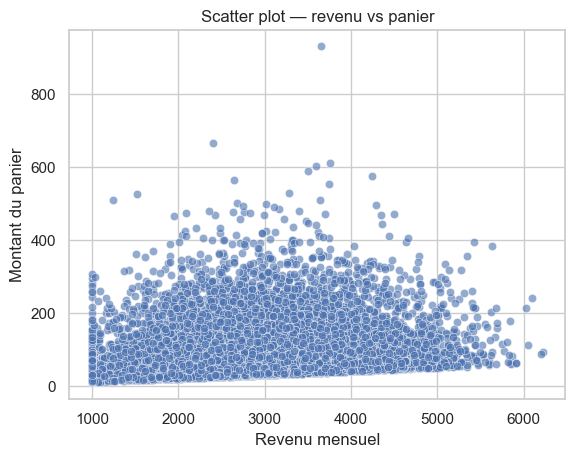

In [3]:
import numpy as np
from scipy import stats

# Variables quantitatives
x = df["revenu_mensuel"]
y = df["montant_panier"]


plt.figure()
if sns: sns.scatterplot(x=x, y=y, alpha=0.6)
else: plt.scatter(x, y, alpha=0.6)
plt.xlabel("Revenu mensuel")
plt.ylabel("Montant du panier")
plt.title("Scatter plot — revenu vs panier")
plt.show()

In [4]:



# --- Covariance ---
cov_xy = np.cov(x, y, ddof=1)[0, 1]

# --- Corrélation de Pearson ---
pearson_r, pearson_p = stats.pearsonr(x, y)

# --- Corrélation de Spearman (monotone) ---
spearman_rho, spearman_p = stats.spearmanr(x, y)

# --- Corrélation de Kendall (τ) ---
kendall_tau, kendall_p = stats.kendalltau(x, y)

print(" Covariance :", cov_xy)
print(f" Corrélation de Pearson : r = {pearson_r:.3f} (p = {pearson_p:.3e})")
print(f" Corrélation de Spearman : ρ = {spearman_rho:.3f} (p = {spearman_p:.3e})")
print(f" Corrélation de Kendall : τ = {kendall_tau:.3f} (p = {kendall_p:.3e})")


 Covariance : 7974.862474043824
 Corrélation de Pearson : r = 0.139 (p = 8.627e-66)
 Corrélation de Spearman : ρ = 0.209 (p = 3.977e-147)
 Corrélation de Kendall : τ = 0.143 (p = 5.134e-151)


# Interprétation de la covariance et des corrélations


| Mesure | Valeurs possibles | Interprétation du signe | Interprétation de l’amplitude | Quand l’utiliser ? |
|--------|-------------------|-------------------------|-------------------------------|---------------------|
| **Covariance** | -∞ → +∞ | Cov > 0 : X↑ → Y↑ (relation positive)  <br> Cov < 0 : X↑ → Y↓ (relation négative) <br> Cov ≈ 0 : pas de relation linéaire détectée | Impossible à comparer entre variables car dépend des unités | Pour savoir si les deux variables évoluent dans le même sens (mais pas pour mesurer l'intensité) |
| **Corrélation de Pearson** | -1 → +1 | r > 0 : relation linéaire positive <br> r < 0 : relation linéaire négative <br> r = 0 : pas de relation linéaire | |r| proche de 1 : relation forte <br> |r| ≈ 0.5 : relation modérée <br> |r| < 0.2 : relation très faible | Lorsque la relation est **linéaire** et que les variables sont relativement symétriques ou normales |
| **Corrélation de Spearman (ρ)** | -1 → +1 | Signe interprété comme Pearson | |ρ| proche de 1 : forte relation **monotone** | Lorsque la relation n’est pas linéaire mais **monotone** (croissante ou décroissante), ou en présence d’outliers |
| **Corrélation de Kendall (τ)** | -1 → +1 | Signe interprété comme Pearson | |τ| < ρ < r en général. <br> τ proche de 1 = forte concordance des rangs | Lorsque l’échantillon est **petit**, ou lorsque l’on veut une mesure robuste de concordance |



##  Comment interpréter la force d’une corrélation ?

| Valeur absolue | Interprétation |
|----------------|----------------|
| **0.00 – 0.19** | Très faible ou nulle |
| **0.20 – 0.39** | Faible |
| **0.40 – 0.59** | Modérée |
| **0.60 – 0.79** | Forte |
| **0.80 – 1.00** | Très forte |



##  À retenir

- La **covariance** indique seulement si X et Y varient **dans le même sens**.  
- Les **corrélations** normalisent la covariance et deviennent **comparables** et **interprétables**.  
- **Pearson** = linéaire, **Spearman** = monotone, **Kendall** = robuste.






#  CAS 2 — QUALI ↔ QUANTI
##Deux modalités (ex : sexe → montant_panier)



###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | sexe, montant_panier |
| Indicateurs | Moyennes par catégorie |
| Graphiques | Boxplot, violin plot |
| Objectif | Comparer deux groupes |


In [5]:
df.groupby("sexe")["montant_panier"].agg(
    moyenne = "mean",
    mediane = "median",
    variance = "var",
    ecart_type = "std",
    minimum = "min",
    Q1 = lambda x: x.quantile(0.25),
    Q2 = "median",
    Q3 = lambda x: x.quantile(0.75),
    maximum = "max",
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25),
    etendue = lambda x: x.max() - x.min()
)

,moyenne,mediane,variance,ecart_type,minimum,Q1,Q2,Q3,maximum,IQR,etendue
sexe,,,,,,,,,,,
Femme,87.985717,69.83,3850.995886,62.056393,10.32,45.05,69.83,111.41,664.40,66.36,654.08
Homme,98.698502,77.94,4870.335673,69.787790,11.43,51.34,77.94,124.25,929.97,72.91,918.54


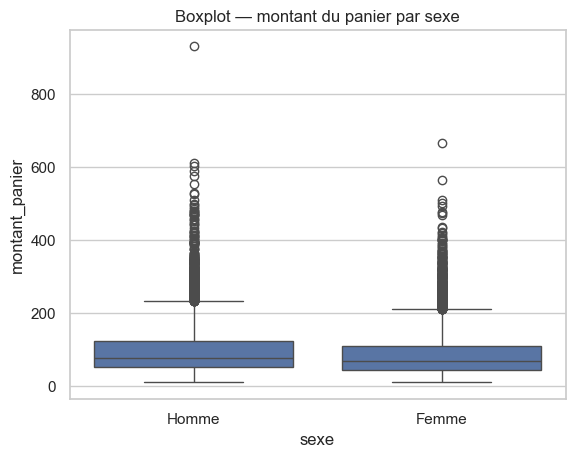

In [6]:

plt.figure()
if sns:
    sns.boxplot(x="sexe", y="montant_panier", data=df)
else:
    groups = [g["montant_panier"].values for _, g in df.groupby("sexe")]
    labels = df["sexe"].unique()
    plt.boxplot(groups, labels=labels)
plt.title("Boxplot — montant du panier par sexe")
plt.show()


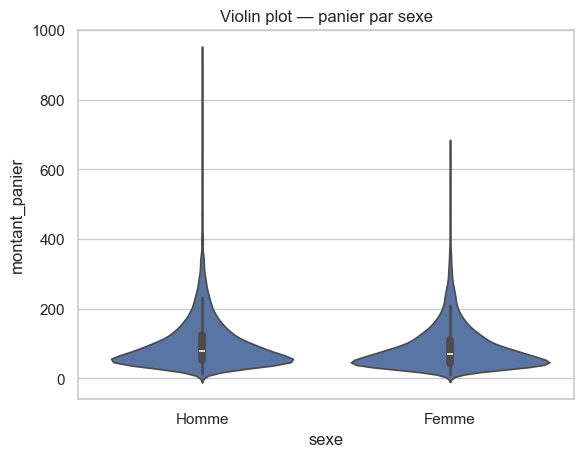

In [7]:


plt.figure()
sns.violinplot(x="sexe", y="montant_panier", data=df)
plt.title("Violin plot — panier par sexe")
plt.show()



##  Trois modalités ou plus (ex : segment_age → montant_panier)





| Élément | Contenu |
|--------|---------|
| Variables | segment_age, montant_panier |
| Indicateurs | Moyennes par groupe |
| Graphiques | Boxplot, barplot |
| Objectif | Comparer plusieurs groupes |


In [8]:
df.groupby("segment_age")["montant_panier"].agg(
    moyenne = "mean",
    mediane = "median",
    variance = "var",
    ecart_type = "std",
    minimum = "min",
    Q1 = lambda x: x.quantile(0.25),
    Q2 = "median",
    Q3 = lambda x: x.quantile(0.75),
    maximum = "max",
    IQR = lambda x: x.quantile(0.75) - x.quantile(0.25),
    etendue = lambda x: x.max() - x.min()
)



,moyenne,mediane,variance,ecart_type,minimum,Q1,Q2,Q3,maximum,IQR,etendue
segment_age,,,,,,,,,,,
Adulte,93.912940,73.85,4527.006478,67.283033,10.32,48.5625,73.85,117.2150,929.97,68.6525,919.65
Jeune,92.168079,73.62,4004.260479,63.279226,11.32,48.7100,73.62,115.6500,470.16,66.9400,458.84
Mature,92.670004,72.72,4302.766874,65.595479,10.37,47.7625,72.72,117.2725,603.40,69.5100,593.03
Senior,102.859880,86.46,4912.568110,70.089715,23.21,51.6550,86.46,129.4950,498.11,77.8400,474.90


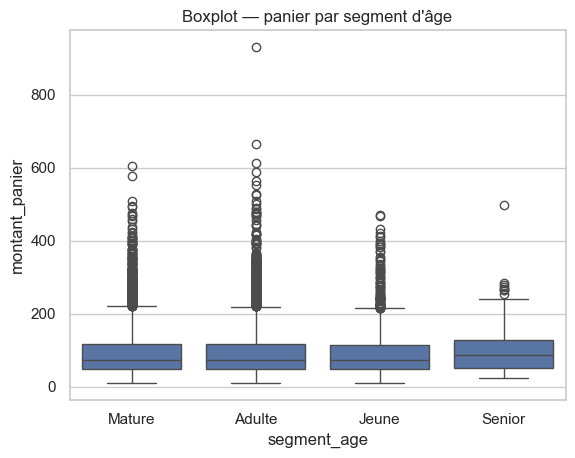

In [9]:

plt.figure()
sns.boxplot(x="segment_age", y="montant_panier", data=df)
plt.title("Boxplot — panier par segment d'âge")
plt.show()


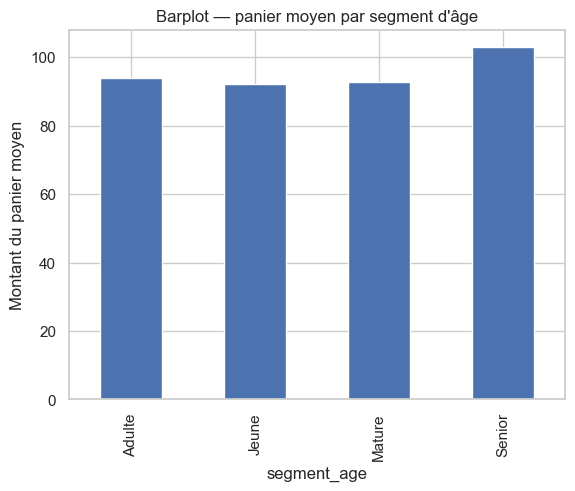

In [10]:

means = df.groupby("segment_age")["montant_panier"].mean()
plt.figure()
means.plot(kind="bar")
plt.ylabel("Montant du panier moyen")
plt.title("Barplot — panier moyen par segment d'âge")
plt.show()




# CAS 3 — QUALI ↔ QUALI  
**Exemple : sexe ↔ retour_produit**



###  Tableau synthétique

| Élément | Contenu |
|--------|---------|
| Variables | sexe, retour_produit |
| Indicateurs | Table de contingence |
| Graphiques | Countplot, heatmap |
| Objectif | Examiner l'association entre deux catégories |


In [11]:

table = pd.crosstab(df["sexe"], df["retour_produit"])
table


retour_produit,Non,Oui
sexe,,
Femme,6722,757
Homme,6718,803


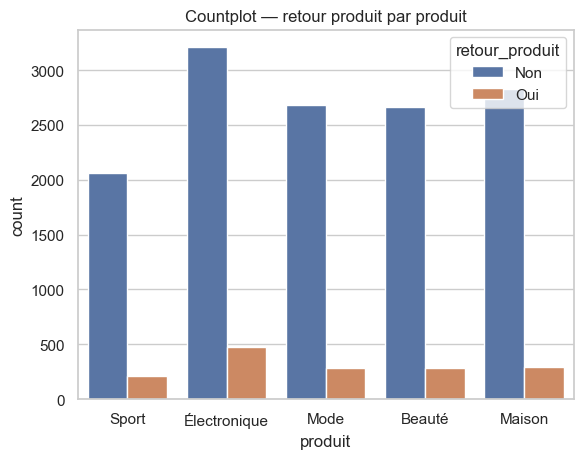

Text(0.5, 1.0, 'Heatmap — table de contingence')

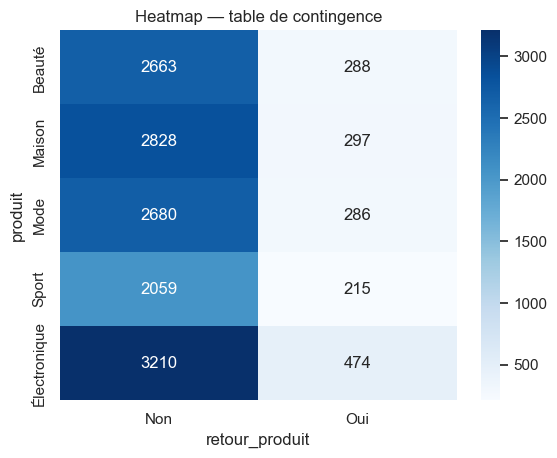

In [14]:

plt.figure()
sns.countplot(x="produit", hue="retour_produit", data=df)
plt.title("Countplot — retour produit par produit")
plt.show()

plt.figure()
sns.heatmap(table, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap — table de contingence")



In [13]:
# Table de contingence brute
table = pd.crosstab(df["produit"], df["retour_produit"])

# Table des proportions (chaque ligne = 100%)
table_prop = table.div(table.sum(axis=1), axis=0) * 100

table_prop

retour_produit,Non,Oui
produit,,
Beauté,90.240596,9.759404
Maison,90.496000,9.504000
Mode,90.357384,9.642616
Sport,90.545295,9.454705
Électronique,87.133550,12.866450


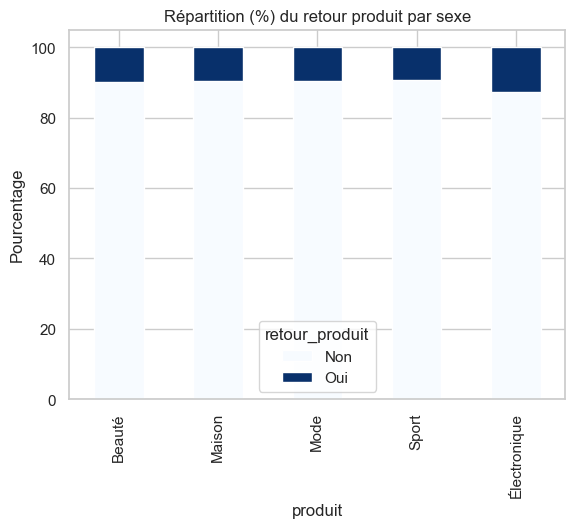

In [15]:
table_prop.plot(kind="bar", stacked=True, colormap="Blues")
plt.title("Répartition (%) du retour produit par sexe")
plt.ylabel("Pourcentage")
plt.show()


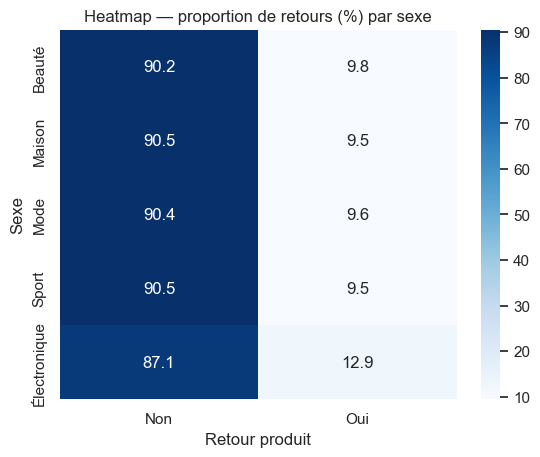

In [16]:
plt.figure()
sns.heatmap(table_prop, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap — proportion de retours (%) par sexe")
plt.ylabel("Sexe")
plt.xlabel("Retour produit")
plt.show()



#  Récapitulatif 

- **QUANTI ↔ QUANTI** : covariance, corrélation, scatter plot  
- **QUALI ↔ QUANTI (2 modalities)** : moyennes par groupe, boxplot, violin plot  
- **QUALI ↔ QUANTI (3+ modalities)** : moyennes par groupe, boxplot, barplot  
- **QUALI ↔ QUALI** : table de contingence, countplot, heatmap  


